# TensorFlow basics
MNIST Example

In [2]:
import tensorflow as tf
print("TensorFlow version: ", tf.__version__)
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

TensorFlow version:  2.9.1


c:\Users\hanse\Documents\python\projects\python-ml\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Mnist Data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 

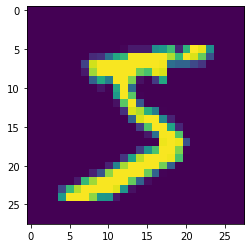

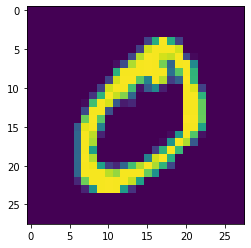

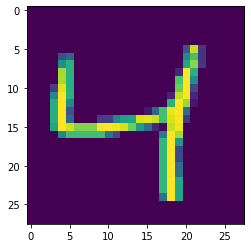

In [4]:
for i in X_train[0:3]:
    plt.imshow(tf.squeeze(i))
    plt.show()

In [5]:
print("Training Data Shape: ", X_train.shape)
print("Single image shape: ", X_train[1,].shape)

Training Data Shape:  (60000, 28, 28)
Single image shape:  (28, 28)


In [6]:
# First we build/define a sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), ##flatten the 28X28 image into a single array
    tf.keras.layers.Dense(128, activation='relu'), ##add a dense hidden layer with relu activation fn
    tf.keras.layers.Dropout(0.01),  ##add dropout rate
    tf.keras.layers.Dense(10) ##add output layer with 10 nodes for 10 classes
])

In [7]:
# Now we define the loss function for training
##y_pred will be a logits tensor since the 'model' object automaticall returns a vector of logits (log-odds, which could then be converted to probabilities) 
##https://www.tensorflow.org/tutorials/quickstart/beginner
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Finally, we compile the model and select an optimizer and any metrics of interest
model.compile(optimizer='adam',
              loss = loss_fn,
              metrics=['accuracy'])

In [8]:
# Now, we can train the model over a series of epochs through the fit method
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1128 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0789 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0598 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0462 - accuracy: 0.9855


In [9]:
# Evaluate the trained model on test data
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0752 - accuracy: 0.9763 - 338ms/epoch - 1ms/step


[0.07521818578243256, 0.9763000011444092]

In [12]:
# It's common to apply a softmax activation function to the output layer to return predicted probabilities
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
##(save weights so they can be reset easily)
weights = prob_model.get_weights()
reset_model = lambda model: prob_model.set_weights(weights) ##lambda fn to reset model weights to randomly initialized

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ##change to false now

prob_model.compile(optimizer='adam',
                   loss=loss_fn,
                   metrics=['accuracy'])


In [16]:
# This time we'll save the model's fit history and also add some validation data
reset_model(prob_model)
history = prob_model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0396 - accuracy: 0.9869 - val_loss: 0.0411 - val_accuracy: 0.9885
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0377 - val_accuracy: 0.9882
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0464 - val_accuracy: 0.9870
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0568 - val_accuracy: 0.9847
Epoch 5/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0544 - val_accuracy: 0.9857


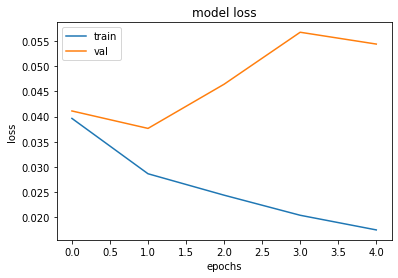

In [17]:
## by assigning the fit to object 'history' we can plot the progress over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

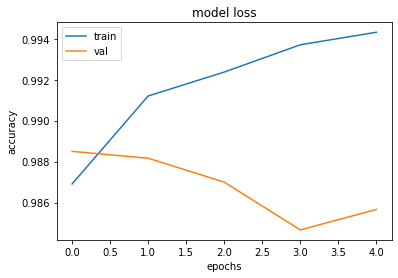

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()